
## Sobre o conjunto de dados
Este é um conjunto de dados simulado que explora como os hábitos de vida afetam o desempenho acadêmico dos alunos. Com 1.000 registros sintéticos de alunos e mais de 15 recursos, incluindo horas de estudo, padrões de sono, uso de mídias sociais, qualidade da dieta, saúde mental e notas de exames finais, é perfeito para projetos de ML, análise de regressão, agrupamento e visualização de dados. Criado com base em padrões realistas para práticas educacionais.

Já se perguntou o quanto assistir à Netflix, dormir ou rolar o TikTok afeta suas notas? 👀 Este conjunto de dados simula os hábitos diários de 1.000 alunos — do tempo de estudo à saúde mental — e os compara com as notas das provas finais. É como espionar seu GPA através das lentes do estilo de vida. Perfeito para EDA, prática de ML ou apenas para curtir dados enquanto finge ser produtivo.

### Importando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importando o o arquivo CSV para manipulação do DataFrame

In [ ]:
df = pd.read_csv('/content/student_habits_performance.csv')

Visualização dos dados

In [ ]:
df['participação_extracurricular'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.head()

,id_do_aluno,idade,sexo,horas_de_estudo_por_dia,horas_de_mídias_sociais,horas_netflix,emprego_de_meio_período,porcentagem_de_frequência,horas_de_sono,qualidade_da_alimentação,frequência_de_exercícios,nível_de_educação_dos_pais,qualidade_da_internet,classificação_de_saúde_mental,participação_extracurricular,nota_da_prova
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Armazenando os valores nulos em uma variavel

In [ ]:
idx = df['nível_de_educação_dos_pais'].isnull()

Retirando os valores Nulos do DataFrame e removendo colunas desnecessárias

In [ ]:
habitos = df[~idx]
habitos.drop(columns=['id_do_aluno'], inplace=True)

/tmp/ipython-input-31-1648666587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  habitos.drop(columns=['id_do_aluno'], inplace=True)


Agrupando os valores em uma Series para ter a visualização detalhada e criando uma função para visualizar em formato de DataFrame

In [ ]:
lista = []
habitos_detalhado = []

for i in habitos.columns:
  titulos = habitos.groupby([i])[i].value_counts()
  habitos_detalhado.append({'Habitos':titulos})
  lista.append([i])


def habitos_transformados(valor):
  df = pd.DataFrame(valor)
  return df


habitos_plt = habitos_transformados(habitos_detalhado)

Pilotando o DataFrame para ter uma visualização em Gráfico de Barras simples

In [ ]:
# for i in habitos_plt['Habitos']:
#   plt.bar(i.index, i.values)
#   plt.title(lista.pop(0))
#   plt.show()

### Trataremos a base de dados para utilização de ML

In [ ]:
# criando uma cópia do dataframe
habitos_ml = habitos.copy()

In [ ]:
# substituindo os dados de mais de uma categoria utilizando o metodo get_dummies
habitos_ml = pd.get_dummies(habitos_ml,columns=['sexo','qualidade_da_alimentação', 'nível_de_educação_dos_pais', 'qualidade_da_internet'])

In [ ]:
# substituindo os dados de categoria binárias
habitos_ml['emprego_de_meio_período'] = habitos_ml['emprego_de_meio_período'].map({'Yes': 1, 'No': 0})

habitos_ml['participação_extracurricular'] = habitos_ml['participação_extracurricular'].map({'Yes': 1, 'No': 0})

In [ ]:
habitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idade                          909 non-null    int64  
 1   sexo                           909 non-null    object 
 2   horas_de_estudo_por_dia        909 non-null    float64
 3   horas_de_mídias_sociais        909 non-null    float64
 4   horas_netflix                  909 non-null    float64
 5   emprego_de_meio_período        909 non-null    object 
 6   porcentagem_de_frequência      909 non-null    float64
 7   horas_de_sono                  909 non-null    float64
 8   qualidade_da_alimentação       909 non-null    object 
 9   frequência_de_exercícios       909 non-null    int64  
 10  nível_de_educação_dos_pais     909 non-null    object 
 11  qualidade_da_internet          909 non-null    object 
 12  classificação_de_saúde_mental  909 non-null    int64  


Validando a correlação das variáveis

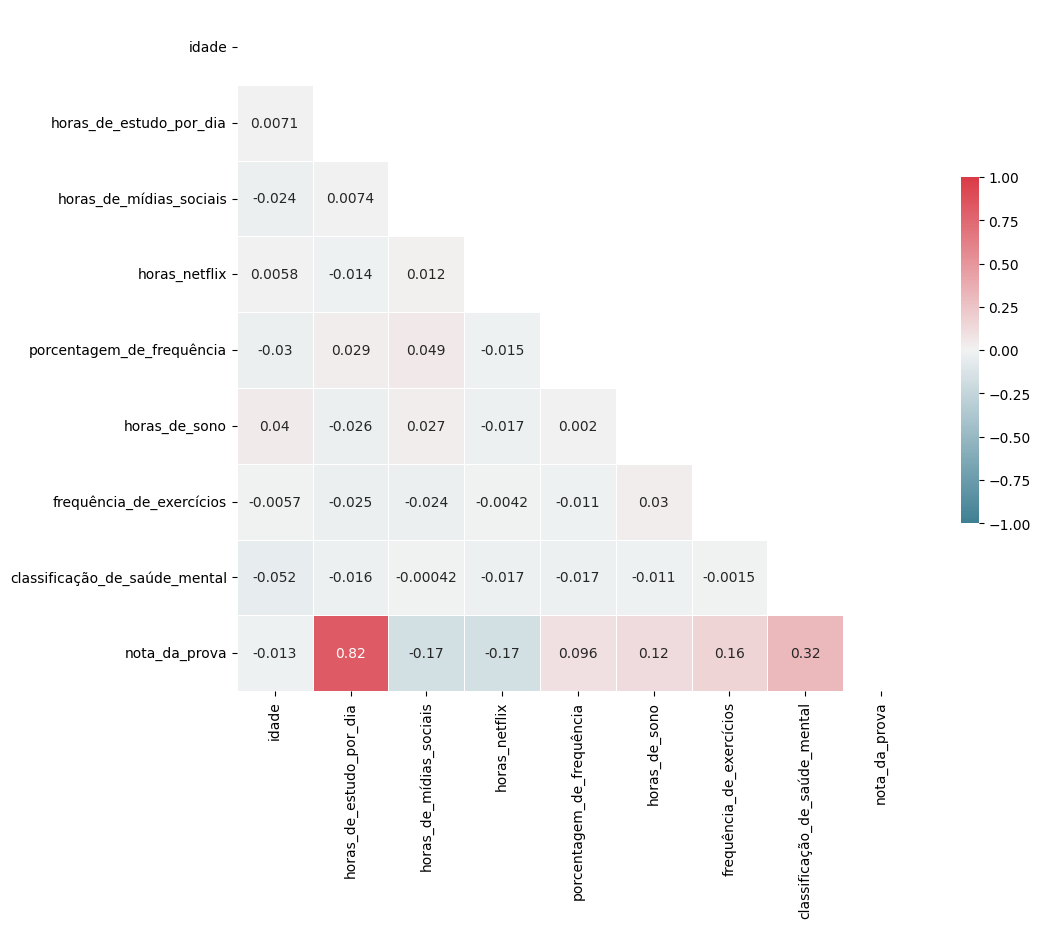

In [ ]:
# Quais fatores estão mais correlacionados?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Correlação
corr = habitos.corr(numeric_only=True)

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()



### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever as notas dos alunos não vistas durante o treinamento, que auxilia na generalização do modelo.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Definindo y e X
y = habitos_ml['nota_da_prova']
X = habitos_ml.drop(columns=['nota_da_prova'])


In [ ]:
# Aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [ ]:
#Dados de treino para usar a fórmula
habitos_train = pd.DataFrame(X_train)
habitos_train['nota_da_prova'] = Y_train
habitos_train

,idade,horas_de_estudo_por_dia,horas_de_mídias_sociais,horas_netflix,emprego_de_meio_período,porcentagem_de_frequência,horas_de_sono,frequência_de_exercícios,classificação_de_saúde_mental,participação_extracurricular,...,qualidade_da_alimentação_Fair,qualidade_da_alimentação_Good,qualidade_da_alimentação_Poor,nível_de_educação_dos_pais_Bachelor,nível_de_educação_dos_pais_High School,nível_de_educação_dos_pais_Master,qualidade_da_internet_Average,qualidade_da_internet_Good,qualidade_da_internet_Poor,nota_da_prova
127,17,4.3,2.2,1.6,0,71.6,9.4,5,7,0,...,False,True,False,True,False,False,False,True,False,88.0
59,21,6.7,2.2,2.6,0,84.5,6.7,3,5,1,...,False,True,False,False,False,True,True,False,False,97.1
280,20,4.5,4.6,2.0,0,87.9,6.5,2,6,0,...,True,False,False,True,False,False,False,True,False,73.8
238,19,5.3,2.7,4.3,0,90.5,6.9,1,4,1,...,True,False,False,True,False,False,False,False,True,74.2
194,23,2.6,4.0,1.1,0,89.4,6.9,0,10,0,...,False,True,False,False,True,False,False,True,False,66.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20,0.9,4.3,4.1,0,90.1,6.1,6,4,0,...,False,True,False,False,True,False,True,False,False,27.6
799,19,3.8,1.2,2.0,0,82.2,7.1,2,2,1,...,False,True,False,True,False,False,True,False,False,66.3
617,24,3.4,2.2,0.4,0,91.4,5.6,5,5,0,...,True,False,False,False,True,False,False,False,True,71.3
999,19,4.3,2.9,1.9,0,89.4,7.1,2,8,0,...,False,True,False,True,False,False,True,False,False,74.9


In [ ]:
# import ols
from statsmodels.formula.api import ols


In [ ]:
# ajustando o primeiro modelo com apenas 1 variável
modelo_0 = ols('nota_da_prova ~ horas_de_estudo_por_dia', data = habitos_train).fit()

In [ ]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:          nota_da_prova   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1346.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          6.79e-159
Time:                        23:17:25   Log-Likelihood:                -2334.6
No. Observations:                 636   AIC:                             4673.
Df Residuals:                     634   BIC:                             4682.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
# importando a biblioteca para efetuar a predição com mais de uma variável
import statsmodels.api as sm

In [ ]:
# adicionando a constante no modelo.
X_train = sm.add_constant(X_train)

In [ ]:
# criando o modelo preditivo adicionando outras variáveis
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','horas_netflix','horas_de_mídias_sociais',
                           'classificação_de_saúde_mental', 'horas_de_sono', 'horas_de_estudo_por_dia']]).fit()

In [ ]:
# visualizando o sumário do modelo
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:          nota_da_prova   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     814.6
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          3.37e-272
Time:                        23:40:57   Log-Likelihood:                -2057.4
No. Observations:                 636   AIC:                             4127.
Df Residuals:                     630   BIC:                             4154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# Criando uma função para onde trará a provável nota com base nas varíaveis estudadas.
def predict(horas_netflix, horas_de_midias_sociais, classificacao_de_saude_mental, horas_de_sono, horas_de_estudo_por_dia):

  pred = pd.DataFrame({
      'const':[1],
      'horas_netflix':[horas_netflix],
      'horas_de_mídias_sociais':[horas_de_midias_sociais],
      'classificação_de_saúde_mental':[classificacao_de_saude_mental],
      'horas_de_sono':[horas_de_sono],
      'horas_de_estudo_por_dia':[horas_de_estudo_por_dia]
  })
  return modelo_1.predict(pred)

,0
0,62.62401
